In [1]:
from astropy.io import ascii
from astropy.io import fits
import numpy as np
import xmatch
import matplotlib.pyplot as plt

In [2]:
f1              =   ascii.read("Binospec-Candels.cat")
f2              =   ascii.read("CandelsPhotometry.txt")
n1              =   fits.open("Newest_Candels_GOODSN.fit")
n2              =   fits.open("Newest_Candels_GOODSN_sfr.fit")
ids             =   f1["id_candels"]
filterNames     =   ['ACS_F435W_FLUX', 'ACS_F606W_FLUX', 'ACS_F775W_FLUX', 'ACS_F814W_FLUX', 'ACS_F850LP_FLUX', 'WFC3_F105W_FLUX', 'WFC3_F125W_FLUX', 'WFC3_F140W_FLUX', 'WFC3_F160W_FLUX']
nfilterNames     =   [ 'F435W', 'F606W', 'F775W', 'F814W', 'F850LP', 'F105W', 'F125W', 'F140W', 'F160W']
nfiltErrNames     =   ["e_"+f for f in nfilterNames]

In [3]:
#i=20
#id=ids[i]

#for gal in f1:
#    if gal["id_candels"]==id:
#        new=gal
#for gal in f2:
#    if gal["ID"]==id:
#        old=gal

#loc,d2d = xmatch.xmatch(ra1=new["ra_candels"],dec1=new["dec_candels"],ra2=n1[1].data["RAJ2000"],dec2=n1[1].data["DEJ2000"])

#updated=n1[1].data[loc]
#updatedSFR=n2[1].data[loc]
#for filter,nfilter in zip(filterNames,nfilterNames):
#    print(new[filter],old[filter], -2.5*np.log10(1e-6*old[filter])+8.9,updated[nfilter])

#print("\n ################### \n")




32504 z6_GNW_30051 -20.087432694878217 NonDetect nan nan 5.58 5.54 0.8284432276832738 -1.4555
28728 z5_GNW_10084 -19.90995435002845 NonDetect nan nan 5.55 5.25 0.7700152490093076 -1.1841
8399 z5_GNW_15423 -20.20897848067796 NonDetect nan nan 5.55 5.41 0.532481690501654 -1.6122
16732 z6_GND_16819 -21.33885018564051 NonDetect nan 5.30498990491625 5.55 1.04 0.52594570658103 -1.3974
17760 z5_GND_14430 -21.42395529083307 NonDetect nan 5.239171778636754 5.51 5.64 -0.04931941150259029 -1.3817
10920 z5_GND_30190 -18.658377209209632 NonDetect nan 5.173256141831026 5.53 1.26 0.3487109607898475 -1.9461
24355 z5_GND_42418 -20.18917002744165 NonDetect nan 5.195677258330505 5.53 5.48 0.2701208107406746 -2.2261
17221 z5_GND_15562 -19.69703369110446 NonDetect nan 5.423574505563603 5.54 5.55 -0.2157122982325927 -1.9694
21328 z5_GND_44499 -19.664450069080004 NonDetect nan nan 5.58 0.95 1.4331521206610152 -0.5606
33163 z6_GNW_27915 -19.91831423614487 NonDetect nan nan 5.56 5.45 -0.33692508235337393 -1.72

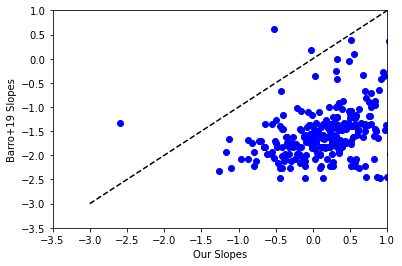

In [4]:
mySlope=[]
theirSlope=[]
for gal in f1:
    loc,d2d = xmatch.xmatch(ra1=gal["ra_candels"],dec1=gal["dec_candels"],ra2=n1[1].data["RAJ2000"],dec2=n1[1].data["DEJ2000"])
    updated=n1[1].data[loc]
    updatedSFR=n2[1].data[loc]
    mySlope.append(gal["slope"])
    theirSlope.append(updatedSFR["beta"])
    print(loc,gal["id_charlotte"],gal["Muv"],gal["Type"],gal["z"],gal["zsys"],gal["photoz"],updatedSFR["zbest"],gal["slope"],updatedSFR["beta"])
    plt.scatter(gal["slope"],updatedSFR["beta"],color="blue")
plt.plot([-3,1],[-3,1],"--",color="black")
plt.xlim(-3.5,1)
plt.ylim(-3.5,1)
plt.ylabel("Barro+19 Slopes")
plt.xlabel("Our Slopes")
plt.show()

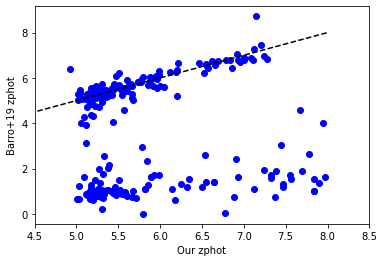

In [5]:
maskz=[]
slps=[]
for gal in f1:
    loc,d2d = xmatch.xmatch(ra1=gal["ra_candels"],dec1=gal["dec_candels"],ra2=n1[1].data["RAJ2000"],dec2=n1[1].data["DEJ2000"])
    updated=n1[1].data[loc]
    updatedSFR=n2[1].data[loc]

    #print(gal["Type"],gal["z"],gal["zsys"],gal["photoz"],updatedSFR["zbest"])
    if gal["Type"]=="LAE":
        maskz.append(True)
        continue
    options={"NonDetect":[gal["zsys"],gal["photoz"]],"LAE":[gal["z"]]}
    choice=options[gal["Type"]]
    if np.isnan(choice[0]):
        z=choice[1]
    else:
        z=choice[0]

    bol=False
    if updatedSFR["zbest"]>4:
        bol=True
    maskz.append(bol)

    plt.scatter(z,updatedSFR["zbest"],color="blue")
plt.plot([0,8],[0,8],"--",color="black")
plt.xlim(4.5,8.5)
plt.ylabel("Barro+19 zphot")
plt.xlabel("Our zphot")
plt.show()

32504 z6_GNW_30051 -20.087432694878217 NonDetect nan nan 5.58 5.54 0.8284432276832738 -1.4555
28728 z5_GNW_10084 -19.90995435002845 NonDetect nan nan 5.55 5.25 0.7700152490093076 -1.1841
8399 z5_GNW_15423 -20.20897848067796 NonDetect nan nan 5.55 5.41 0.532481690501654 -1.6122
17760 z5_GND_14430 -21.42395529083307 NonDetect nan 5.239171778636754 5.51 5.64 -0.04931941150259029 -1.3817
24355 z5_GND_42418 -20.18917002744165 NonDetect nan 5.195677258330505 5.53 5.48 0.2701208107406746 -2.2261
17221 z5_GND_15562 -19.69703369110446 NonDetect nan 5.423574505563603 5.54 5.55 -0.2157122982325927 -1.9694
33163 z6_GNW_27915 -19.91831423614487 NonDetect nan nan 5.56 5.45 -0.33692508235337393 -1.7294
21128 z6_GNW_25971 -20.062588029706088 LAE 5.956095708630309 nan 6.1 2.5 3.25432078816313 -1.0606
23060 z6_GNW_23437 -20.719667211510234 NonDetect nan nan 5.99 6.13 -0.32446317531228114 -1.9782
25266 z6_GNW_22717 -20.484228836463355 NonDetect nan nan 5.86 5.67 0.4451191710585281 -1.7545
34690 z6_GNW_23

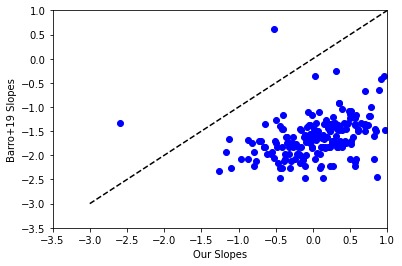

In [6]:
mySlope=[]
myUV=[]
theirSlope=[]
locs=[]
for gal in f1[maskz]:
    loc,d2d = xmatch.xmatch(ra1=gal["ra_candels"],dec1=gal["dec_candels"],ra2=n1[1].data["RAJ2000"],dec2=n1[1].data["DEJ2000"])
    locs.append(loc)
    updated=n1[1].data[loc]
    updatedSFR=n2[1].data[loc]
    mySlope.append(gal["slope"])
    myUV.append(gal["Muv"])
    theirSlope.append(updatedSFR["beta"])
    print(loc,gal["id_charlotte"],gal["Muv"],gal["Type"],gal["z"],gal["zsys"],gal["photoz"],updatedSFR["zbest"],gal["slope"],updatedSFR["beta"])
    plt.scatter(gal["slope"],updatedSFR["beta"],color="blue")
plt.plot([-3,1],[-3,1],"--",color="black")
plt.xlim(-3.5,1)
plt.ylim(-3.5,1)
plt.ylabel("Barro+19 Slopes")
plt.xlabel("Our Slopes")
plt.show()

In [7]:
Cwaves  = [ 	4360.06  , 6035.73 , 7730.77 ,8129.21,9080.26,10542.47 ,  12503.91 , 13983.36 , 15437.71 ]# , 5413.32 , 11696.34 , 6323.81   ]
EffW    = [ [3610.23,4883.77	],[	4634.30,7180.10]    , [6803.72,8631.82]   , [6869.59,9632.01	]  ,[8007.01,10862.13], [8955.2,12130.5] ,  [10853.22, 14141.73] , [11864.94,16133.14] , [13857.70,17003.09] ]# , 1098    , 3856     , 1232  ]
def removeBands(Cwaves,EffW,z,ShowPlots=False):
    '''
    Sacar bandas que caen a la izquierde de lyman alpha y a la derecha del break
    '''
    Mask=[]
    Cwaves  =   np.array(Cwaves)
    EffW    =   np.array(EffW)   
    LyaLimit   =   1220.56 * (z+1)
    BreakLimit  =   3800.0*(z+1)
    #print(np.log10(LyaLimit),np.log10(BreakLimit))
    for Wave,Width in zip(Cwaves,EffW):

        if  Width[0] > LyaLimit and Width[1] < BreakLimit:
            #print("WIDE",LyaLimit,Width[0],Width[1],BreakLimit,"PASS")
            Mask.append(True)
        else:
            #print("WIDE",LyaLimit,Width[0],Width[1],BreakLimit,"No PASS")
            Mask.append(False)

    return Mask

def PowerLaw(x, beta, c):
    """
    Not really a power law since we are at log scale
    """
    return x*beta +c 


In [8]:
plt.scatter(sls,mySlope)
plt.plot([-3,1],[-3,1])

NameError: name 'sls' is not defined

In [9]:
sls=[]
for l in locs:
    loc=l
    updated=n1[1].data[loc]
    updatedSFR=n2[1].data[loc]
    z=updatedSFR["zbest"]
    mask=removeBands(Cwaves,EffW,z)

    fluxes=np.array([1e-6*updated[f] for f in nfilterNames])[mask]
    errfluxes=np.array([1e-6*updated[f] for f in nfiltErrNames])[mask]
    wave=np.array(Cwaves)[mask]
    maskNinetyNines = (fluxes>0.0) & (fluxes!=-99.0) 
    fluxes,errfluxes,wave=fluxes[maskNinetyNines],errfluxes[maskNinetyNines],wave[maskNinetyNines]
    #to Hz
    fluxes,errfluxes=fluxes*1e-23/(1+z),errfluxes*1e-23/(1+z)
    #print(wave)
    #fluxes,errfluxes=fluxes*(2.998e18/(wave**2)),errfluxes*(2.998e18/(wave**2)) #convert to f lambda
    try:
        popt, pcov = curve_fit(PowerLaw, np.log10(wave), np.log10(fluxes),absolute_sigma=True,sigma=errfluxes,p0=[0,-10])
    except:
        popt=np.array([99,99])
    print(popt[0]-2)
    sls.append(popt[0]-2)

97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-3.5       , -3.38333333, -3.26666667, -3.15      , -3.03333333,
        -2.91666667, -2.8       , -2.68333333, -2.56666667, -2.45      ,
        -2.33333333, -2.21666667, -2.1       , -1.98333333, -1.86666667,
        -1.75      , -1.63333333, -1.51666667, -1.4       , -1.28333333,
        -1.16666667, -1.05      , -0.93333333, -0.81666667, -0.7       ,
        -0.58333333, -0.46666667, -0.35      , -0.23333333, -0.11666667,
         0.        ]),
 <BarContainer object of 30 artists>)

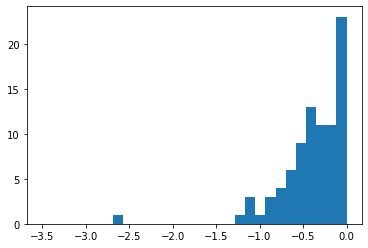

In [10]:
plt.hist(mySlope,range=[-3.5,0],bins=30)
plt.hist(sls,range=[-3.5,0],bins=30,alpha=0.5)

In [75]:
from scipy.optimize import curve_fit

loc=34397
updated=n1[1].data[loc]
updatedSFR=n2[1].data[loc]
z=updatedSFR["zbest"]
mask=removeBands(Cwaves,EffW,z)

fluxes=np.array([1e-6*updated[f] for f in nfilterNames])[mask]
errfluxes=np.array([1e-6*updated[f] for f in nfiltErrNames])[mask]
wave=np.array(Cwaves)[mask]
maskNinetyNines = (fluxes>0.0) & (fluxes!=-99.0) 
fluxes,errfluxes,wave=fluxes[maskNinetyNines],errfluxes[maskNinetyNines],wave[maskNinetyNines]
#to Hz
fluxes,errfluxes=fluxes*1e-23/(1+z),errfluxes*1e-23/(1+z)
#print(wave)
#fluxes,errfluxes=fluxes*(2.998e18/(wave**2)),errfluxes*(2.998e18/(wave**2)) #convert to f lambda

popt, pcov = curve_fit(PowerLaw, np.log10(wave), np.log10(fluxes),absolute_sigma=True,sigma=errfluxes,p0=[0,-10])
print(popt-2)



[ -1.61744034 -14.12966944]


In [84]:
from astropy.cosmology import FlatLambdaCDM
def modelo(beta):
    c=2.99792458E+18
    cosmo   =   FlatLambdaCDM(H0=70,Om0=0.3,Tcmb0=2.725)
    dL      =   cosmo.luminosity_distance(z).value
    DM=5*(np.log10(dL*10**6) - 1)
    x_1500=1500.*(1+6.62)
    Muv=-19.19
    x=np.linspace(wave[0],wave[-1],100)
    model = (((x/x_1500)**(beta)) * 10**((Muv+48.6+DM)/-2.5))
    return model
x=np.linspace(wave[0],wave[-1],100)

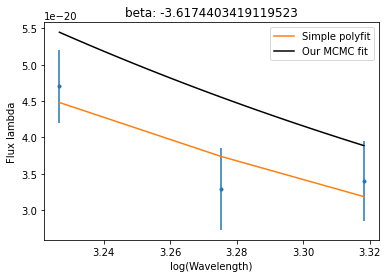

In [85]:
plt.errorbar(np.log10(wave),fluxes,yerr=errfluxes,fmt=".")
plt.plot(np.log10(wave),10**PowerLaw(np.log10(wave),*popt),label="Simple polyfit")
#plt.plot(np.log10(wave),10**PowerLaw(np.log10(wave),-2.2,-12.06))
plt.plot(np.log10(x),modelo(-1.838+2),color="black",label="Our MCMC fit")
plt.plot(np.log10(x),modelo(-2.2+2),color="red",label="Their beta slope")
plt.title("beta: "+ str(popt[0]-2))
plt.ylabel("Flux lambda")
plt.xlabel("log(Wavelength)")
plt.legend()
plt.show()

In [74]:
modelo(0)

array([4.66464132e-20, 4.64260922e-20, 4.62073284e-20, 4.59901073e-20,
       4.57744143e-20, 4.55602351e-20, 4.53475557e-20, 4.51363620e-20,
       4.49266402e-20, 4.47183767e-20, 4.45115581e-20, 4.43061709e-20,
       4.41022019e-20, 4.38996383e-20, 4.36984670e-20, 4.34986754e-20,
       4.33002508e-20, 4.31031808e-20, 4.29074532e-20, 4.27130557e-20,
       4.25199763e-20, 4.23282032e-20, 4.21377246e-20, 4.19485288e-20,
       4.17606043e-20, 4.15739399e-20, 4.13885242e-20, 4.12043462e-20,
       4.10213948e-20, 4.08396592e-20, 4.06591286e-20, 4.04797925e-20,
       4.03016402e-20, 4.01246614e-20, 3.99488459e-20, 3.97741834e-20,
       3.96006638e-20, 3.94282773e-20, 3.92570140e-20, 3.90868641e-20,
       3.89178180e-20, 3.87498662e-20, 3.85829993e-20, 3.84172079e-20,
       3.82524829e-20, 3.80888150e-20, 3.79261953e-20, 3.77646149e-20,
       3.76040648e-20, 3.74445364e-20, 3.72860210e-20, 3.71285101e-20,
       3.69719951e-20, 3.68164677e-20, 3.66619196e-20, 3.65083427e-20,
      

(3e-22, 1.1e-21)

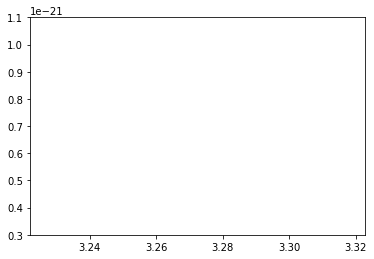

In [62]:
plt.errorbar(np.log10(wave),fluxes,yerr=errfluxes,marker="o",ls=" ")
plt.ylim(0.3e-21,1.1e-21)

In [192]:
updated["F160W"]

0.35108

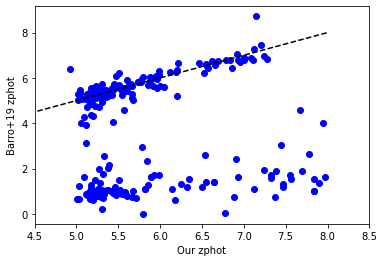

In [214]:
Cat=

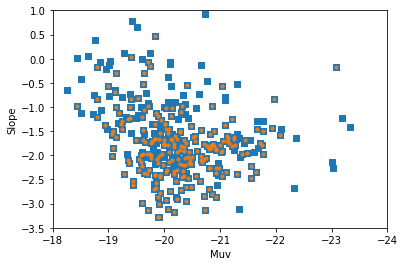

In [215]:
plt.scatter(f1["Muv"],f1["slope"],marker="s")
plt.scatter(Cat["Muv"],Cat["slope"],alpha=0.8,s=10)
plt.xlim(-18,-24)
plt.ylim(-3.5,1)
plt.xlabel("Muv")
plt.ylabel("Slope")
plt.show()


ValueError: x and y must be the same size

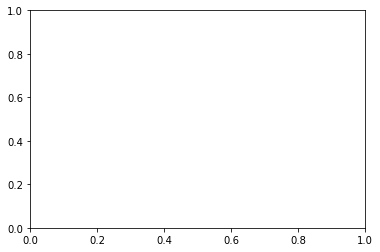

In [216]:
#plt.scatter(f1["Muv"],f1["slope"],marker="s")
plt.scatter(Cat["Muv"],np.array(theirSlope),alpha=0.8,s=10)
plt.xlim(-18,-24)
plt.ylim(-3.,1)
plt.xlabel("Muv")
plt.ylabel("Barro Slope")
plt.show()


(-3.5, 1.0)

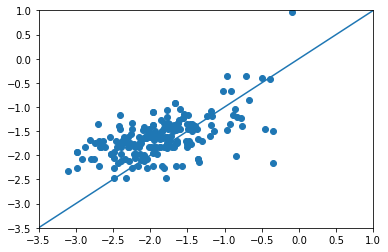

In [380]:
plt.scatter(sls,theirSlope)
plt.plot([-3.5,1],[-3.5,1])
plt.xlim(-3.5,1)
plt.ylim(-3.5,1)

32504 z6_GNW_30051 -20.128931107061664 NonDetect nan nan 5.58 5.54 -1.190686702053894 -1.4555
28728 z5_GNW_10084 -19.938443338075835 NonDetect nan nan 5.55 5.25 -1.2609875834194324 -1.1841
8399 z5_GNW_15423 -19.702270601587664 NonDetect nan nan 5.55 5.41 -0.06510005020849174 -1.6122
17760 z5_GND_14430 -21.392139479143136 NonDetect nan 5.239171778636754 5.51 5.64 -1.9639387085463804 -1.3817
24355 z5_GND_42418 -20.37350871068348 NonDetect nan 5.195677258330505 5.53 5.48 -2.194581514980414 -2.2261
17221 z5_GND_15562 -19.887460901615242 NonDetect nan 5.423574505563603 5.54 5.55 -2.8612837004932303 -1.9694
33163 z6_GNW_27915 -19.92230620638879 NonDetect nan nan 5.56 5.45 -2.401571782674657 -1.7294
21128 z6_GNW_25971 -20.097861528549146 LAE 5.956095708630309 nan 6.1 2.5 1.1253870633149878 -1.0606
23060 z6_GNW_23437 -20.852759710298237 NonDetect nan nan 5.99 6.13 -2.800086153553556 -1.9782
25266 z6_GNW_22717 -20.524057633602542 NonDetect nan nan 5.86 5.67 -1.6226118322622696 -1.7545
34690 z6_

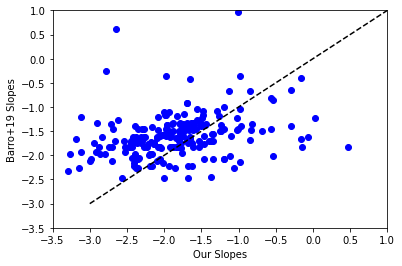

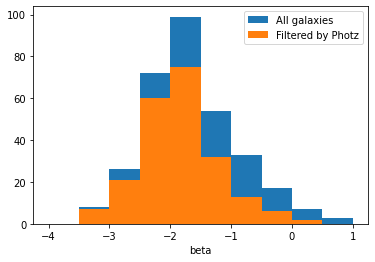

-1.6996354113813172 -1.8482077753762156


In [155]:
plt.hist(f1["slope"],range=[-4,1],label="All galaxies")
plt.hist(Cat["slope"],range=[-4,1],label="Filtered by Photz")
plt.xlabel("beta")
plt.legend()
plt.show()

print(np.median(f1["slope"]),np.median(Cat["slope"]))

(array([0.1607717 , 0.34565916, 0.54662379, 0.63504823, 0.32958199,
        0.2170418 , 0.09646302, 0.12861736, 0.01607717, 0.02411576]),
 array([-3. , -2.6, -2.2, -1.8, -1.4, -1. , -0.6, -0.2,  0.2,  0.6,  1. ]),
 <BarContainer object of 10 artists>)

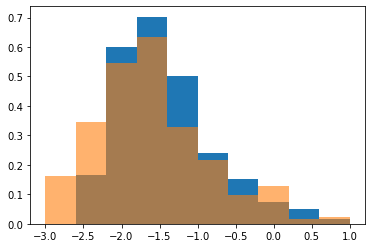

In [81]:
plt.hist(n2[1].data["beta"],range=[-3,1],density=True)
plt.hist(f1["slope"],range=[-3,1],density=True,alpha=0.6)